# Preparando o terreno

In [0]:
import pandas as pd

In [40]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [41]:
avaliacoes = pd.read_csv('https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [42]:
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [43]:
# separando as informações de um unico Filme por ID
avaliacoes_do_filme_1 = avaliacoes.query('filmeId==1')
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [44]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [45]:
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [46]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [47]:
#media geral das notas
avaliacoes['nota'].mean()

3.501556983616962

In [48]:
#media geral do filme 1
avaliacoes_do_filme_1['nota'].mean()

3.9209302325581397

In [49]:
#media das notas para todos os filmes
notas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [50]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [51]:
#join da tabela de FILMES com a tabela de NOTAS_MEDIAS_POR_FILME
filmes_com_media = filmes.join(notas_medias_por_filme, on='filmeId')
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [52]:
filmes_com_media.sort_values('nota', ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


# Deafio 1
*Determine quantos filmes não tem avaliações e quais são esses filmes.*

Dentro do `pandas.DataFrame` existe uma função contrária ao `head()` que é a `tail()`, fazendo uma analogia a Cabeça e Rabo (kkk).

Mesma forma de utilizar, se não passar parâmentro ele irá trazer os 5 últimos da tabela.

Passando a quantidade informada pelo Paulo, que foram 18 filmes sem avaliações temos o seguinte resultado:

In [53]:
filmes_com_media.sort_values('nota').tail(18)

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# Desafio 2

*Mudar o nome da coluna nota do dataframe "filmes_com_media" para nota_média após o join*

In [54]:
filmes_com_media.columns = ['filmeId', 'titulo', 'generos', 'nota_media']
filmes_com_media

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


# Desafio 3

*Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.*

Primeiro crie uma variável com os totais de votos por filme.

In [55]:
total_votos_por_filme = avaliacoes.groupby('filmeId')['nota'].count()
total_votos_por_filme

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

E gere a nova tabela através do `join` para que possa ver a média e a quantidade total de votos.

In [56]:
filmes_com_total_votos = filmes_com_media.join(total_votos_por_filme, on="filmeId")
filmes_com_total_votos.columns = ['filmeId', 'titulo', 'generos', 'nota_media', 'total_votos']
filmes_com_total_votos

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0
9739,193585,Flint (2017),Drama,3.500000,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0


Caso queira testar, dá pra ter uma ideia realizando o plot do filme.

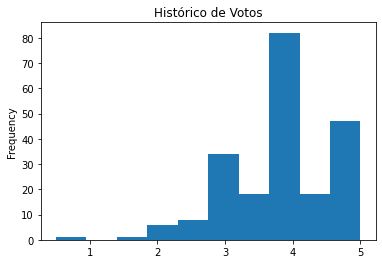

In [57]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Histórico de Votos")
plt.show()

# Desafio 4

*Arredondar as médias (coluna de nota média) para duas casas decimais.*

In [58]:
filmes_com_total_votos.round(2)

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


# Desafio 5

*Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)*

In [59]:
# Remove os valores duplicados da coluna de generos
generos = pd.Series(filmes['generos'].unique())
generos

0      Adventure|Animation|Children|Comedy|Fantasy
1                       Adventure|Children|Fantasy
2                                   Comedy|Romance
3                             Comedy|Drama|Romance
4                                           Comedy
                          ...                     
946              Adventure|Mystery|Sci-Fi|Thriller
947                     Action|Comedy|Crime|Horror
948               Action|Adventure|Children|Sci-Fi
949         Action|Adventure|Comedy|Fantasy|Sci-Fi
950                Action|Animation|Comedy|Fantasy
Length: 951, dtype: object

In [60]:
# Separa os valores de dentro de cada coluna e gera um set
set_generos = set()
for x in generos.str.split('|'):
    for y in x:
        set_generos.add(y)
set_generos

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Desafio 6

*Contar o número de aparições de cada genero.*

In [61]:
# Converte o set em lista
list_generos = sorted(list(set_generos))
# Cria um DataFrame para receber os valores da lista de generos e as repetições
df_generos = pd.DataFrame()
df_generos['generos'] = list_generos
# Gera a segunda coluna baseada na contagem de generos no df de Filmes
df_generos['repetições'] = [len([x for x in filmes['generos'] if y in x]) for y in list_generos]
df_generos

,generos,repetições
0,(no genres listed),34
1,Action,1828
2,Adventure,1263
3,Animation,611
4,Children,664
5,Comedy,3756
6,Crime,1199
7,Documentary,440
8,Drama,4361
9,Fantasy,779


# Desafio 7

*Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.*

Text(0.5, 1.0, 'Número de repetições por gêneros')

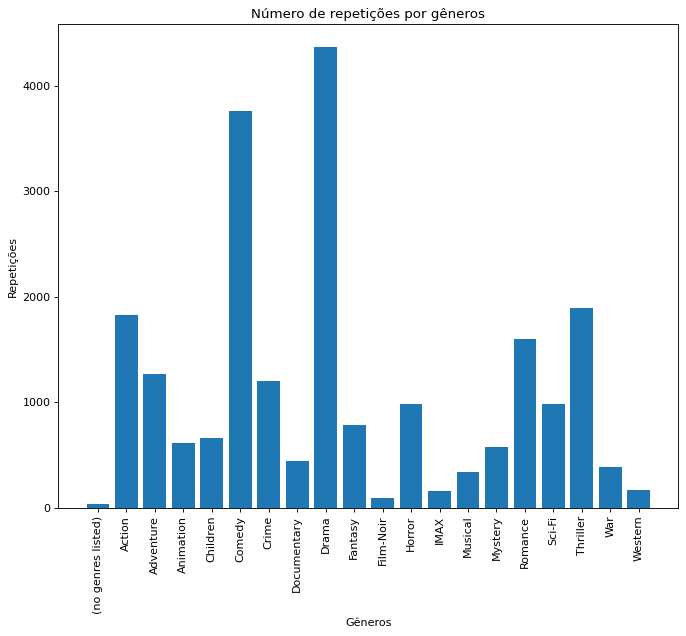

In [83]:
import matplotlib.pyplot as plt

# Seta o tamanho e cores do grafico
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
# Define quais colunas serão "plotadas"
plt.bar(df_generos['generos'], df_generos['repetições'])
# Gira os Gêneros no eixo x, no caso
plt.xticks(rotation=90)
plt.xlabel('Gêneros')
plt.ylabel('Repetições')
plt.title('Número de repetições por gêneros')

# Extra
https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c